In [3]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Arrays for storing temperatures, function values, iterations, and states
temperatures = []
function_values = []
iterations = []
states = []


# Initial parameters
L_0 = 50  # Fixed Markov chain length


# Define the two-variable function
def f(x, y):
    return (x - 3)**2 + (y + 2)**2 + 5

def simulate(temp):
    current_x = random.uniform(-3, 4)
    current_y = random.uniform(-3, 4)
    best_solution = (current_x, current_y)
    best_value = f(current_x, current_y)

    data_dimensions = 3
    simulation_data = np.empty((500, L_0, data_dimensions))

    L_i = L_0

    for i in range(1, 501):

        trails = 1
        while trails < L_i:
            new_x = random.uniform(-3, 4)
            new_y = random.uniform(-3, 4)
            delta_E = f(new_x, new_y) - f(current_x, current_y)

            if delta_E <= 0 or random.uniform(0, 1) < math.exp(-delta_E / temp):
                current_x = new_x
                current_y = new_y

                simulation_data[i, trails - 1, 0] = temp
                simulation_data[i, trails - 1, 1] = trails
                simulation_data[i, trails - 1, 2] = f(current_x, current_y)

            trails += 1

            best_solution = (current_x, current_y)
            best_value = f(current_x, current_y)


        states.append(best_solution)
        function_values.append(best_value)
        temperatures.append(temp)
        iterations.append(i)

        # Decrease the temperature
        delta_T = temp * 0.05
        temp -= delta_T

    return best_solution, best_value, states, function_values, temperatures, iterations,simulation_data

In [5]:
best_solution, best_value, states, function_values,temperatures,iterations,simulation_data= simulate(1500)

In [6]:
target_temp = 500
closest_iteration = np.argmin(np.abs(np.array(temperatures) - target_temp))

In [7]:
function_values_for_temp = simulation_data[closest_iteration, :, 2]

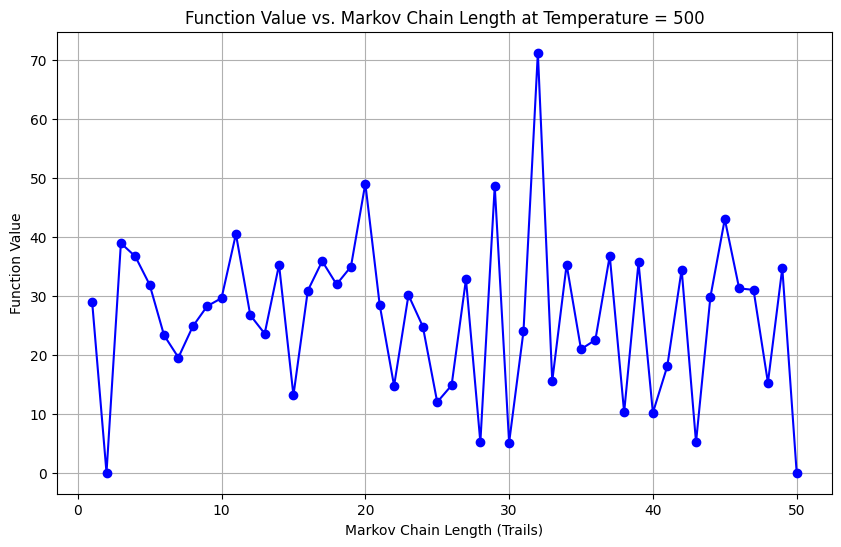

In [8]:
# Plot the function values vs. Markov chain length (1 to 50 trails)
plt.figure(figsize=(10, 6))
plt.plot(range(1, L_0 + 1), function_values_for_temp, marker='o', linestyle='-', color='b')
plt.xlabel('Markov Chain Length (Trails)')
plt.ylabel('Function Value')
plt.title('Function Value vs. Markov Chain Length at Temperature = 500')
plt.grid(True)
plt.show()

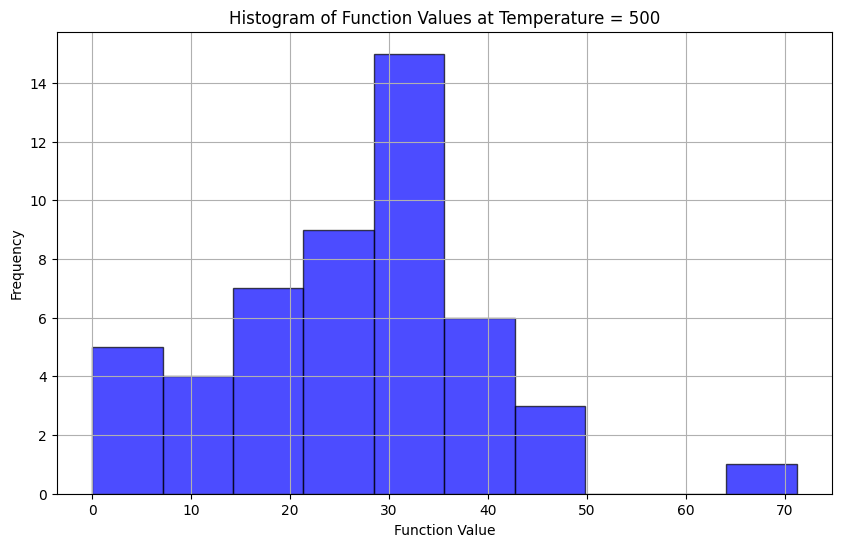

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(function_values_for_temp, bins=10, edgecolor='black', color='blue', alpha=0.7)
plt.xlabel('Function Value')
plt.ylabel('Frequency')
plt.title('Histogram of Function Values at Temperature = 500')
plt.grid(True)
plt.show()

In [10]:
value_at_500th_index = function_values[499]
print("Value at the 500th index:", value_at_500th_index)

Value at the 500th index: 5.001925651020581


In [22]:
target_temp = 100
closest_iteration = np.argmin(np.abs(np.array(temperatures) - target_temp))
function_values_for_temp = simulation_data[closest_iteration, :, 2]

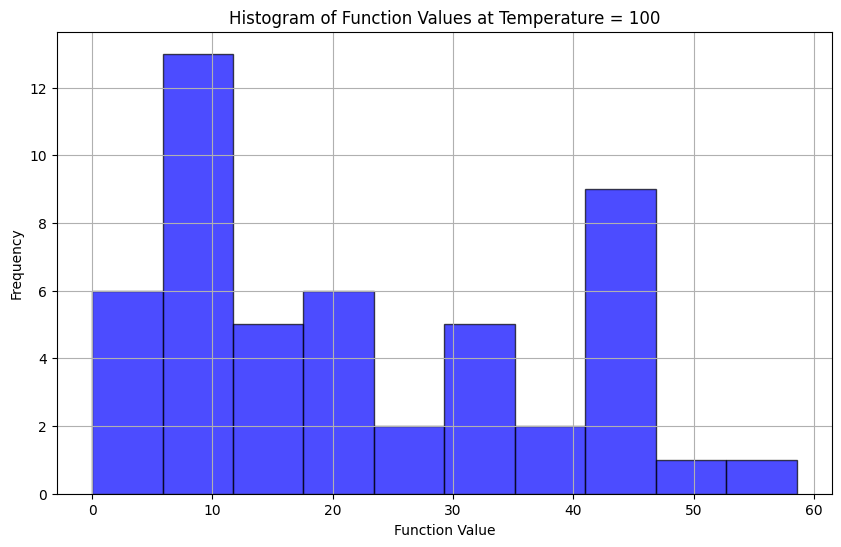

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(function_values_for_temp, bins=10, edgecolor='black', color='blue', alpha=0.7)
plt.xlabel('Function Value')
plt.ylabel('Frequency')
plt.title('Histogram of Function Values at Temperature = 100')
plt.grid(True)
plt.show()

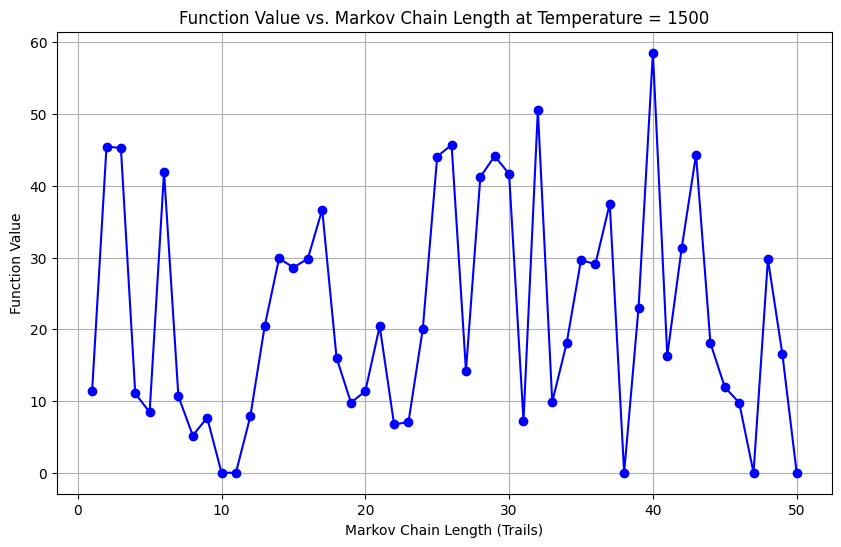

In [26]:
# Plot the function values vs. Markov chain length (1 to 50 trails)
plt.figure(figsize=(10, 6))
plt.plot(range(1, L_0 + 1), function_values_for_temp, marker='o', linestyle='-', color='b')
plt.xlabel('Markov Chain Length (Trails)')
plt.ylabel('Function Value')
plt.title('Function Value vs. Markov Chain Length at Temperature = 1500')
plt.grid(True)
plt.show()

In [27]:
function_values_for_temp = simulation_data[closest_iteration, :, 2]

In [28]:
function_values_for_temp

array([11.40997288, 45.46953056, 45.27839058, 11.05274214,  8.43425689,
       41.91331651, 10.65364262,  5.1823089 ,  7.67129063,  0.        ,
        0.        ,  7.84158186, 20.42189467, 29.89130872, 28.60148379,
       29.83798544, 36.68343693, 16.01885772,  9.7741445 , 11.36809253,
       20.42638899,  6.75192951,  7.04512818, 20.09454129, 44.08437668,
       45.70920834, 14.22583798, 41.24149615, 44.14853119, 41.64963559,
        7.23346368, 50.55852114,  9.86296209, 18.04327279, 29.65026744,
       29.07900623, 37.51904958,  0.        , 22.94897474, 58.55483739,
       16.31426084, 31.26902048, 44.33657773, 18.08530984, 11.9269088 ,
        9.77158227,  0.        , 29.77461526, 16.61331124,  0.        ])